SuperStoreOrders dataset

I'll be performing a 10days Data Analytics Challenge on a Super Store Orders Database of over 50,000 data to find insights, trends, patterns and come up with business decisions.
I will be using python and Tableau for this project.
Today, I will be defining the project objectives

1. Which product has the highest number of sales and in which country and region?

2. Which product has the highest number of customer demands, in what country and region?

3. Which product or products produced the highest profit?
4. How does the shipping cost and method affect the sales of products

Join me as I take you through the process and allow me show you how business decisions are made with Data Analytics.

The dataset contains the following key variables;
order_id, order_date, ship_date, ship_mode, customer_name, segment, state, country, market, region, product_id, category,  sub_category,
product_name, sales, quantity, discount, profit, shipping_cost, order_priority, year.

In [134]:
import numpy as np
import pandas as pd

In [135]:
SuperStoreOrders = pd.read_csv(r'C:\Users\GLOBALLY HYKZE\Downloads\SuperStoreOrders.csv')
SuperStoreOrders

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0000,106.1400,35.4600,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1000,36.0360,9.7200,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0000,29.6400,8.1700,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5000,-26.0550,4.8200,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1000,37.7700,4.7000,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2000,4.5188,0.8900,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0000,0.4200,0.4900,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0000,12.3600,0.3500,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0000,0.5600,0.2000,Medium,2014


In [136]:
#to view all the columns
#pd.set_option('display.max.columns',22)
# to view all the rows
#pd.set_option('display.max.rows',None)


But based on the objectives of this project, we will be working with;
ship_date, ship_mode, customer_name, state, country, region, product_id, category,  sub_category, product_name, sales, quantity, discount, profit, shipping_cost,
order_priority, year

In [137]:
#lets gets all our columns for easy copy
#SuperStoreOrders =  SuperStoreOrders.columns
#SuperStoreOrders

The new dataset we will be working with will be:

In [138]:
SuperStoreOrders = SuperStoreOrders[['ship_date', 'ship_mode', 'customer_name','state', 'country','region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit','shipping_cost','order_priority', 'year']]
#SuperStoreOrders

In [139]:
 #let check the general info of the table
SuperStoreOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ship_date       51290 non-null  object 
 1   ship_mode       51290 non-null  object 
 2   customer_name   51290 non-null  object 
 3   state           51290 non-null  object 
 4   country         51290 non-null  object 
 5   region          51290 non-null  object 
 6   product_id      51290 non-null  object 
 7   category        51290 non-null  object 
 8   sub_category    51290 non-null  object 
 9   product_name    51290 non-null  object 
 10  sales           51290 non-null  object 
 11  quantity        51290 non-null  int64  
 12  discount        51290 non-null  float64
 13  profit          51290 non-null  float64
 14  shipping_cost   51290 non-null  float64
 15  order_priority  51290 non-null  object 
 16  year            51290 non-null  int64  
dtypes: float64(3), int64(2), object

Since the number of rows and columns are non-null and are 51290 columns and 21 rows that means all entry are
filled we can also confirm this by:


In [140]:
#SuperStoreOrder = SuperStoreOrders.isnull().sum()
#SuperStoreOrder

lets observe the colunms out
we can see that sales column is objects istead of a integer. now lets view it fist and converts


In [141]:
check_sales_type = SuperStoreOrders['sales'].info()
#check_sales_type

<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: sales
Non-Null Count  Dtype 
--------------  ----- 
51290 non-null  object
dtypes: object(1)
memory usage: 400.8+ KB


 we can see that some of them contains comma so lets conver to integers  and first we have to replace (',','')

In [142]:
SuperStoreOrders['sales'] = SuperStoreOrders['sales'].str.replace(',','')
#pd.set_option('display.max.rows',None)
#SuperStoreOrders['sales']

C:\Users\GLOBALLY HYKZE\AppData\Local\Temp\ipykernel_10248\1553258415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders['sales'] = SuperStoreOrders['sales'].str.replace(',','')


In [143]:
#Then we convert to int. this is good for easy analysis

SuperStoreOrders['sales'] = SuperStoreOrders['sales'].astype('int')
SuperStoreOrders['quantity'] = SuperStoreOrders['quantity'].astype('int')

SuperStoreOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ship_date       51290 non-null  object 
 1   ship_mode       51290 non-null  object 
 2   customer_name   51290 non-null  object 
 3   state           51290 non-null  object 
 4   country         51290 non-null  object 
 5   region          51290 non-null  object 
 6   product_id      51290 non-null  object 
 7   category        51290 non-null  object 
 8   sub_category    51290 non-null  object 
 9   product_name    51290 non-null  object 
 10  sales           51290 non-null  int32  
 11  quantity        51290 non-null  int32  
 12  discount        51290 non-null  float64
 13  profit          51290 non-null  float64
 14  shipping_cost   51290 non-null  float64
 15  order_priority  51290 non-null  object 
 16  year            51290 non-null  int64  
dtypes: float64(3), int32(2), int64(

C:\Users\GLOBALLY HYKZE\AppData\Local\Temp\ipykernel_10248\3710788234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders['sales'] = SuperStoreOrders['sales'].astype('int')
C:\Users\GLOBALLY HYKZE\AppData\Local\Temp\ipykernel_10248\3710788234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders['quantity'] = SuperStoreOrders['quantity'].astype('int')


#There is an abbreviation in this dataset, and I would like to explain what it means.

EMEA in the Region column, which means Europe, Middle East and Africa.

This will help me understand how my data is structured
lets start by calling the uniques to view the abbreviations

In [144]:
#SuperStoreOrders = SuperStoreOrders['region'].unique()
#SuperStoreOrders

In [173]:
#Since we only have EMEA. then we replace it with Europe, Middle East and Africa
#SuperStoreOrders['region'] = SuperStoreOrders['region'].str.replace('EMEA', 'Europe, Middle East and Africa')
#SuperStoreOrders

,ship_date,ship_mode,customer_name,state,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,6/1/2011,Standard Class,Toby Braunhardt,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0000,106.1400,35.4600,Medium,2011
1,8/1/2011,Standard Class,Joseph Holt,New South Wales,Australia,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1000,36.0360,9.7200,Medium,2011
2,5/1/2011,Second Class,Annie Thurman,Budapest,Hungary,"Europe, Middle East and Africa",OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0000,29.6400,8.1700,High,2011
3,5/1/2011,Second Class,Eugene Moren,Stockholm,Sweden,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5000,-26.0550,4.8200,High,2011
4,8/1/2011,Standard Class,Joseph Holt,New South Wales,Australia,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1000,37.7700,4.7000,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,4/1/2015,Standard Class,Erica Bern,California,United States,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2000,4.5188,0.8900,Medium,2014
51286,5/1/2015,Standard Class,Liz Preis,Souss-Massa-Draâ,Morocco,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0000,0.4200,0.4900,Medium,2014
51287,2/1/2015,Second Class,Charlotte Melton,Managua,Nicaragua,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0000,12.3600,0.3500,Medium,2014
51288,6/1/2015,Standard Class,Tamara Dahlen,Chihuahua,Mexico,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0000,0.5600,0.2000,Medium,2014


Firstly, Data Cleaning is a very important part of Data Analysis because real-world datasets frequently include a variety of problems,including outliers, inaccurate or inconsistent data entries, duplicate records, missing values, inconsistent formatting, and inconsistent formatting. These problems may occur as a result of human error during data entry, computer errors,
data integration from several sources, or other circumstances.
HERE ARE SOME OF THE PRIMARY OBJECTIVES WE CARRY OUT DATA CLEANING

1.REMOVING IRRELEVANT OR REDUNDANT DATA: This entails removing variables or columns that do not help to the analysis,
have no value or not consistent with the project objectives.

2. HANDLING MISSING DATA: Missing data can be problematic and can change analytical results.
Depending on the unique situation and the objectives, data cleaning procedures are used to resolve missing values by either
imputing them (estimating the missing values based on other data points) or eliminating the records with missing values.
3. CORRECTING INCONSISTENCIES: To guarantee data integrity and accuracy, inconsistent data entries such as misspellings, multiple
representations of the same value (e.g., "USA," "United States"), or contradicting information must be handled. This could entail
standardizing formats, merging comparable categories, or resolving conflicting values via manual or automated processes.

Now lets perform DESCRIPTIVE (STATISTICAL) ANALYSIS on the dataset so as to derive more insight from the data.
This is an integral part of EXPLORATORY DATA ANALYSIS (EDA) and a key aspect to help us derive deeper meaning from our data

let filter and split the data into different years available in the dataset: 2011, 2012, 2013, 2014 and then from 2011 to 2014.

In [146]:
SuperStoreOrders= SuperStoreOrders.reset_index(drop=True)
SuperStoreOrders

,ship_date,ship_mode,customer_name,state,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,6/1/2011,Standard Class,Toby Braunhardt,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0000,106.1400,35.4600,Medium,2011
1,8/1/2011,Standard Class,Joseph Holt,New South Wales,Australia,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1000,36.0360,9.7200,Medium,2011
2,5/1/2011,Second Class,Annie Thurman,Budapest,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0000,29.6400,8.1700,High,2011
3,5/1/2011,Second Class,Eugene Moren,Stockholm,Sweden,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5000,-26.0550,4.8200,High,2011
4,8/1/2011,Standard Class,Joseph Holt,New South Wales,Australia,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1000,37.7700,4.7000,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,4/1/2015,Standard Class,Erica Bern,California,United States,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2000,4.5188,0.8900,Medium,2014
51286,5/1/2015,Standard Class,Liz Preis,Souss-Massa-Draâ,Morocco,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0000,0.4200,0.4900,Medium,2014
51287,2/1/2015,Second Class,Charlotte Melton,Managua,Nicaragua,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0000,12.3600,0.3500,Medium,2014
51288,6/1/2015,Standard Class,Tamara Dahlen,Chihuahua,Mexico,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0000,0.5600,0.2000,Medium,2014


In [174]:
year_2011 = SuperStoreOrders[SuperStoreOrders['year'] == 2011]
year_2011 = year_2011.describe()
#year_2011

,sales,quantity,discount,profit,shipping_cost,year
count,8998.0000,8998.0000,8998.0000,8998.0000,8998.0000,8998.0000
mean,251.1126,3.4944,0.1482,27.6662,27.1473,2011.0000
std,536.8951,2.2830,0.2167,170.2972,59.8762,0.0000
min,1.0000,1.0000,0.0000,-3701.8928,0.0200,2011.0000
25%,30.0000,2.0000,0.0000,0.0000,2.6200,2011.0000
50%,84.0000,3.0000,0.0000,9.0300,7.8500,2011.0000
75%,254.0000,5.0000,0.2000,36.3762,24.4575,2011.0000
max,22638.0000,14.0000,0.8000,4630.4755,894.7700,2011.0000


We can observe that .describe() doesnt have the statistic parameter of SUM(). this is important to us as we need to know the sum
total of the profit each year...

Lets Build a second DataFrame.
Year_2011

In [175]:
Year_2011 = pd.DataFrame(year_2011.sum(), columns = ['sum']).T
# we den join them together
Yearr_2011=pd.concat([year_2011,Year_2011])
#Yearr_2011
#Yearr_2011.to_excel('Year 2011.xlsx')

,sales,quantity,discount,profit,shipping_cost,year
count,8998.0000,8998.0000,8998.0000,8998.0000,8998.0000,8998.0000
mean,251.1126,3.4944,0.1482,27.6662,27.1473,2011.0000
std,536.8951,2.2830,0.2167,170.2972,59.8762,0.0000
min,1.0000,1.0000,0.0000,-3701.8928,0.0200,2011.0000
25%,30.0000,2.0000,0.0000,0.0000,2.6200,2011.0000
50%,84.0000,3.0000,0.0000,9.0300,7.8500,2011.0000
75%,254.0000,5.0000,0.2000,36.3762,24.4575,2011.0000
max,22638.0000,14.0000,0.8000,4630.4755,894.7700,2011.0000
sum,32793.0076,9028.7774,8999.3649,10169.9523,10014.7410,21064.0000


Let follow in like manner
year_2012

In [176]:
year_2012 = SuperStoreOrders[SuperStoreOrders['year']==2012]
year_2012 = year_2012.describe()
#year_2012

,sales,quantity,discount,profit,shipping_cost,year
count,10962.0000,10962.0000,10962.0000,10962.0000,10962.0000,10962.0000
mean,244.2522,3.4766,0.1413,28.0437,25.8613,2012.0000
std,450.3033,2.2541,0.2121,155.6347,56.5924,0.0000
min,1.0000,1.0000,0.0000,-2639.9912,0.0000,2012.0000
25%,32.0000,2.0000,0.0000,0.0000,2.6500,2012.0000
50%,87.0000,3.0000,0.0000,9.5116,7.8000,2012.0000
75%,250.0000,5.0000,0.2000,37.0725,23.5600,2012.0000
max,6355.0000,14.0000,0.8500,3177.4750,933.5700,2012.0000


In [150]:
Year_2012 = pd.DataFrame(year_2012.sum(), columns = ['sum']).T
Yearr_2012= pd.concat([year_2012,Year_2012])
Yearr_2012
# WE SEND IT TO EXCEL
#Yearr_2012.to_excel('Year 2012.xlsx')

,sales,quantity,discount,profit,shipping_cost,year
count,10962.0000,10962.0000,10962.0000,10962.0000,10962.0000,10962.0000
mean,244.2522,3.4766,0.1413,28.0437,25.8613,2012.0000
std,450.3033,2.2541,0.2121,155.6347,56.5924,0.0000
min,1.0000,1.0000,0.0000,-2639.9912,0.0000,2012.0000
25%,32.0000,2.0000,0.0000,0.0000,2.6500,2012.0000
50%,87.0000,3.0000,0.0000,9.5116,7.8000,2012.0000
75%,250.0000,5.0000,0.2000,37.0725,23.5600,2012.0000
max,6355.0000,14.0000,0.8500,3177.4750,933.5700,2012.0000
sum,18381.5556,10992.7307,10963.4034,11729.7463,12012.0337,23034.0000


2013

In [178]:
year_2013= SuperStoreOrders[SuperStoreOrders['year'] == 2013]
year_2013= year_2013.describe()
#year_2013

,sales,quantity,discount,profit,shipping_cost,year
count,13799.0000,13799.0000,13799.0000,13799.0000,13799.0000,13799.0000
mean,246.8193,3.4884,0.1403,29.6045,26.4186,2013.0000
std,494.7222,2.2802,0.2101,190.6437,57.0822,0.0000
min,1.0000,1.0000,0.0000,-6599.9780,0.0100,2013.0000
25%,31.0000,2.0000,0.0000,0.0000,2.6200,2013.0000
50%,85.0000,3.0000,0.0000,9.2400,7.8300,2013.0000
75%,250.0000,5.0000,0.2000,36.8720,24.9650,2013.0000
max,17500.0000,14.0000,0.8000,8399.9760,923.6300,2013.0000


In [179]:


Year_2013 = pd.DataFrame(year_2013.sum(), columns = ['sum']).T
Yearr_2013=pd.concat([year_2013,Year_2013])
#Yearr_2013
# WE SEND IT TO EXCEL
#Yearr_2013.to_excel('Year 2013.xlsx')

,sales,quantity,discount,profit,shipping_cost,year
count,13799.0000,13799.0000,13799.0000,13799.0000,13799.0000,13799.0000
mean,246.8193,3.4884,0.1403,29.6045,26.4186,2013.0000
std,494.7222,2.2802,0.2101,190.6437,57.0822,0.0000
min,1.0000,1.0000,0.0000,-6599.9780,0.0100,2013.0000
25%,31.0000,2.0000,0.0000,0.0000,2.6200,2013.0000
50%,85.0000,3.0000,0.0000,9.2400,7.8300,2013.0000
75%,250.0000,5.0000,0.2000,36.8720,24.9650,2013.0000
max,17500.0000,14.0000,0.8000,8399.9760,923.6300,2013.0000
sum,32407.5416,13829.7685,13800.3503,15865.3582,14841.5558,25877.0000


Year_2014

In [180]:
year_2014= SuperStoreOrders[SuperStoreOrders['year'] == 2014]
year_2014= year_2014.describe()
#year_2014

,sales,quantity,discount,profit,shipping_cost,year
count,17531.0000,17531.0000,17531.0000,17531.0000,17531.0000,17531.0000
mean,245.2821,3.4580,0.1433,28.7585,26.2682,2014.0000
std,477.6307,2.2909,0.2118,174.2834,56.5453,0.0000
min,0.0000,1.0000,0.0000,-3839.9904,0.0100,2014.0000
25%,30.0000,2.0000,0.0000,0.0000,2.5700,2014.0000
50%,84.0000,3.0000,0.0000,9.2000,7.7200,2014.0000
75%,251.0000,5.0000,0.2000,36.8085,24.4550,2014.0000
max,14000.0000,14.0000,0.8000,6719.9808,867.6900,2014.0000


In [182]:


Year_2014 = pd.DataFrame(year_2014.sum(), columns = ['sum']).T
Yearr_2014=pd.concat([year_2014, Year_2014])
Yearr_2014
#Yearr_2014.to_excel('Year 2014.xlsx')

,sales,quantity,discount,profit,shipping_cost,year
count,17531.0000,17531.0000,17531.0000,17531.0000,17531.0000,17531.0000
mean,245.2821,3.4580,0.1433,28.7585,26.2682,2014.0000
std,477.6307,2.2909,0.2118,174.2834,56.5453,0.0000
min,0.0000,1.0000,0.0000,-3839.9904,0.0100,2014.0000
25%,30.0000,2.0000,0.0000,0.0000,2.5700,2014.0000
50%,84.0000,3.0000,0.0000,9.2000,7.7200,2014.0000
75%,251.0000,5.0000,0.2000,36.8085,24.4550,2014.0000
max,14000.0000,14.0000,0.8000,6719.9808,867.6900,2014.0000
sum,32618.9128,17561.7488,17532.3551,20660.0409,18516.2585,29615.0000


2011-2014

In [183]:
SuperStoreOrders_sum = SuperStoreOrders[['sales', 'quantity', 'discount', 'shipping_cost','profit']]
Year_2011_2014 = pd.DataFrame(SuperStoreOrders_sum.sum() , columns = ["sum"] ).T
#Year_2011_2014


,sales,quantity,discount,shipping_cost,profit
sum,12642905.0000,178312.0000,7329.7280,1352820.6900,1469034.8213


Join the two DataFrames.


In [184]:
Yearr_2011_2014= pd.concat([SuperStoreOrders_sum.describe(),Year_2011_2014 ])#.sort_values(by='profit')
Yearr_2011_2014

#Yearr_2011_2014.to_excel('Year 2011-2014.xlsx')

,sales,quantity,discount,shipping_cost,profit
count,51290.0000,51290.0000,51290.0000,51290.0000,51290.0000
mean,246.4984,3.4765,0.1429,26.3759,28.6417
std,487.5672,2.2788,0.2123,57.2968,174.4241
min,0.0000,1.0000,0.0000,0.0000,-6599.9780
25%,31.0000,2.0000,0.0000,2.6100,0.0000
50%,85.0000,3.0000,0.0000,7.7900,9.2400
75%,251.0000,5.0000,0.2000,24.4500,36.8100
max,22638.0000,14.0000,0.8500,933.5700,8399.9760
sum,12642905.0000,178312.0000,7329.7280,1352820.6900,1469034.8213


we will look at statistics for Sales, Quantity and Profit based on the different Order Priorities


In [155]:
SQPO = SuperStoreOrders[['order_priority','sales', 'quantity','profit']]
#SQPO['order_priority'].unique()
SQPO.reset_index(inplace = True)
#SQPO.drop(columns = 'year', inplace = True)
SQPO

,index,order_priority,sales,quantity,profit
0,0,Medium,408,2,106.1400
1,1,Medium,120,3,36.0360
2,2,High,66,4,29.6400
3,3,High,45,3,-26.0550
4,4,Medium,114,5,37.7700
...,...,...,...,...,...
51285,51285,Medium,14,2,4.5188
51286,51286,Medium,4,1,0.4200
51287,51287,Medium,26,3,12.3600
51288,51288,Medium,7,1,0.5600


Order_priority Low

In [185]:
SQPO_low = SQPO[SQPO['order_priority'] == 'Low'].drop(columns='index')
#SQPO_low
SQPO_lowss =SQPO_low.describe()
SQPO_lowss
#SQPO1
# lets add sum
low = SQPO_low.sum(numeric_only=True)
SQPO_lows = pd.DataFrame(low,columns = ['sum']).T

# lets add mode
d = SQPO_low.mode(numeric_only=True)
mo_de = d.rename(index ={0:'mode'} )
#mo_de
# Lets add median
d = SQPO_low.median(numeric_only=True)
med_ian = pd.DataFrame(d,columns=['median']).T

L = pd.concat([SQPO_lowss,SQPO_lows,mo_de,med_ian])
#L
#L.to_excel('Low Priority.xlsx')

,sales,quantity,profit
count,2424.0000,2424.0000,2424.0000
mean,234.2587,3.4229,24.1980
std,440.4849,2.2140,204.2809
min,2.0000,1.0000,-6599.9780
25%,30.0000,2.0000,0.0000
50%,83.5000,3.0000,9.0000
75%,252.7500,5.0000,35.1100
max,7959.0000,14.0000,3979.0800
sum,567843.0000,8297.0000,58655.8510
mode,11.0000,2.0000,0.0000


Order_priority Medium

In [186]:
SQPO_medium = SQPO[SQPO['order_priority'] == 'Medium'].drop(columns='index')
SQPO_mediums   =SQPO_medium.describe()
#SQPO_medium
medium = SQPO_medium.sum(numeric_only=True)
SQPO_mediumss = pd.DataFrame(medium,columns = ['sum']).T

# lets add mode
d = SQPO_medium.mode(numeric_only=True)
mo_de = d.rename(index ={0:'mode'} )
#mo_de
# Lets add median
d = SQPO_medium.median(numeric_only=True)
med_ian = pd.DataFrame(d,columns=['median']).T
M = pd.concat([SQPO_mediums,SQPO_mediumss,mo_de,med_ian ])
#M
#M.to_excel('Medium Priority.xlsx')

,sales,quantity,profit
count,29433.0000,29433.0000,29433.0000
mean,247.3790,3.4844,29.3617
std,506.5865,2.2810,178.1120
min,0.0000,1.0000,-3701.8928
25%,31.0000,2.0000,0.0000
50%,85.0000,3.0000,9.2400
75%,250.0000,5.0000,36.5400
max,22638.0000,14.0000,8399.9760
sum,7281105.0000,102555.0000,864203.7626
mode,13.0000,2.0000,0.0000


#Order_priority High

In [187]:
SQPO_high = SQPO[SQPO['order_priority'] == 'High'].drop(columns='index')
SQPO_highs =SQPO_high.describe()
#SQPO_medium
high = SQPO_high.sum(numeric_only=True)
SQPO_highss = pd.DataFrame(high,columns = ['sum']).T

# lets add mode
d = SQPO_high.mode(numeric_only=True)
mo_de = d.rename(index ={0:'mode'} )
#mo_de
# Lets add median
d = SQPO_high.median(numeric_only=True)
med_ian = pd.DataFrame(d,columns=['median']).T
H= pd.concat([SQPO_highs,SQPO_highss,mo_de,med_ian ])
#H
#H.to_excel('High Priority.xlsx')

,sales,quantity,profit
count,15501.0000,15501.0000,15501.0000
mean,245.6422,3.4850,27.1191
std,460.5915,2.2863,162.4396
min,1.0000,1.0000,-3839.9904
25%,30.0000,2.0000,0.0000
50%,85.0000,3.0000,9.1800
75%,252.0000,5.0000,37.2600
max,11200.0000,14.0000,3919.9888
sum,3807699.0000,54021.0000,420373.5134
mode,13.0000,2.0000,0.0000


Order_priority critical

In [159]:
SQPO_critical = SQPO[SQPO['order_priority'] == 'Critical'].drop(columns='index')
SQPO_critical #= SQPO_critical.describe()

,order_priority,sales,quantity,profit
7,Critical,276,1,110.4120
20,Critical,36,3,4.7430
75,Critical,13,3,5.2398
101,Critical,363,1,159.8700
102,Critical,589,4,276.6000
...,...,...,...,...
51205,Critical,17,2,0.2400
51238,Critical,120,4,30.0000
51241,Critical,289,5,75.1500
51242,Critical,78,2,35.9200


In [188]:
SQPO_critical = SQPO[SQPO['order_priority'] == 'Critical'].drop(columns='index')
SQPO_criticals =SQPO_critical.describe()
#SQPO_critical
critical = SQPO_critical.sum(numeric_only=True)
SQPO_criticalss = pd.DataFrame(critical,columns = ['sum']).T

# lets add mode
d = SQPO_critical.mode(numeric_only=True)
mo_de = d.rename(index ={0:'mode'} )
#mo_de
# Lets add median
d = SQPO_critical.median(numeric_only=True)
med_ian = pd.DataFrame(d,columns=['median']).T
C= pd.concat([SQPO_criticals,SQPO_criticalss,mo_de,med_ian ])
#C
#C.to_excel('Critical Priority.xlsx')

,sales,quantity,profit
count,3932.0000,3932.0000,3932.0000
mean,250.8286,3.4179,31.9943
std,473.2857,2.2713,172.1207
min,1.0000,1.0000,-4088.3760
25%,31.0000,2.0000,0.3387
50%,85.0000,3.0000,9.7182
75%,255.0000,4.2500,39.1275
max,8750.0000,14.0000,2799.9840
sum,986258.0000,13439.0000,125801.6943
mode,16.0000,2.0000,0.0000


Total order_priorities

In [189]:
s=SQPO.drop(columns='index')
order_priority  = s.describe()
#SQPO_medium
stats =s.mode(numeric_only=True)
# now lets rename our index
y = stats.rename(index= {0: 'mode'})
# Lets add median
d = s.median(numeric_only=True)
med_ian = pd.DataFrame(d,columns=['median']).T
# the sum
order_prioritys = pd.DataFrame(s.sum(numeric_only=True), columns = ['sum']).T
all= pd.concat([order_priority,order_prioritys,y,med_ian])
#all
#all.to_excel('Total Order Priority.xlsx')

,sales,quantity,profit
count,51290.0000,51290.0000,51290.0000
mean,246.4984,3.4765,28.6417
std,487.5672,2.2788,174.4241
min,0.0000,1.0000,-6599.9780
25%,31.0000,2.0000,0.0000
50%,85.0000,3.0000,9.2400
75%,251.0000,5.0000,36.8100
max,22638.0000,14.0000,8399.9760
sum,12642905.0000,178312.0000,1469034.8213
mode,13.0000,2.0000,0.0000


on performing DESCRIPTIVE ANALYSIS on the dataset, we will look at statistics for Sales, Quantity and Profit based on the different Order Priorities

(Low, Medium, High and Critical) as well as all Order Priorities put together.  From the statistical analysis performed, we can draw the following insight from the data.

1. For the sales (price of product), the low MEAN means lower average prices. This could mean different things, from; that the dataset's products or services are competitively priced or positioned as more cheap alternatives, intense competition, economic downturn, or oversupply, the products are relatively similar or have lower perceived value compared to competitors, etc.

For the product of quantity sold, the low MEAN means a lower volume average sales volume, which means a low in quantity of products purchased for the different order priorities. This could lead to a very low profit.

2. The mode: For the quantity of products sold, the mode signifies the preferred quantity range for products
sold, this gives an idea of the quantity range customers order frequently.

For sales (price), the mode infers a popular price point in the dataset, what price points customers leverage on the most.

It should be noted that the relationship between these statistical metrics and business outcomes such as pricing, quantity, and profit is complex and context dependent.


So we will be exploring these cases

1. Which category of product has the highest number of quantity purchased?

2. Which region has the highest number of products sold and in which category?

3. The effect of the shipping cost on products, sales and profit

4. The effect of discount on the sales, quantity sold, and profit in the categories

1. Which category of product has the highest number of quantity purchased?

In [190]:
SuperStoreOrders_sum = SuperStoreOrders[['product_name','quantity','sales', 'discount', 'profit','shipping_cost', 'category']]
category_VS_QP = SuperStoreOrders[['category','quantity']]
category_VS_QP= category_VS_QP.reset_index(drop= True)
category_VS_QP = category_VS_QP.groupby('category').agg({'category':'nunique', 'quantity': 'sum'})
category_VS_QP
#category_VS_QP.to_excel('Category VS Quantity and Product.xlsx')
#SuperStoreOrders_sum.groupby(['product_name', 'category']).sum().sort_values(by ='quantity', ascending=False )

,category,quantity
category,,
Furniture,1,34954
Office Supplies,1,108182
Technology,1,35176


2. Which region has the highest number of products sold and in which category?

In [191]:
SuperStoreOrders_sum = SuperStoreOrders[['product_name','quantity','sales', 'discount', 'profit','shipping_cost', 'category']]
region_VS_PC = SuperStoreOrders[['region', 'category','profit' ]]
region_VS_PC = region_VS_PC.reset_index(drop= True)
df11 = region_VS_PC.groupby(['region'] ).agg({'category':'nunique','profit':'sum'}).sort_values(by =('profit'), ascending=False)
df11
#df11.to_excel('Region Vs No of Product.xlsx')

,category,profit
region,,
Central,3,311403.9816
North,3,194597.9525
North Asia,3,165578.4210
South,3,140355.7662
Central Asia,3,132480.1870
Oceania,3,121666.6420
West,3,108418.4489
East,3,91522.7800
Africa,3,88871.6310


In [192]:
region_VS_PC = SuperStoreOrders[['region', 'category','profit' ]]
region_VS_PC = region_VS_PC.reset_index(drop= True)
df2 = region_VS_PC.groupby(['region', 'category'] ).agg({'category':'nunique','profit':'sum'}).sort_values(by =('profit'), ascending=False)
df2
#df2.to_excel('Region VS Category and Profit.xlsx')

category      profit
region                         category                             
Central                        Technology              1 135538.4206
                               Office Supplies         1 121314.7209
North                          Technology              1  99272.4915
North Asia                     Technology              1  72471.0150
South                          Office Supplies         1  67495.9988
North                          Office Supplies         1  64403.3930
Central Asia                   Technology              1  56439.9750
Oceania                        Technology              1  54734.0220
Central                        Furniture               1  54550.8401
West                           Office Supplies         1  52609.8490
North Asia                     Furniture               1  52181.3010
South                          Technology              1  50208.1393
Central Asia                   Furniture               1  48935.7120
East                           Technology              1  47462.0351
West                           Technology              1  44303.6496
Africa                         Technology              1  44129.4930
East                           Office Supplies         1  41014.5791
North Asia                     Office Supplies         1  40926.1050
Oceania                        Furniture               1  33626.4340
                               Office Supplies         1  33306.1860
North                          Furniture               1  30922.0680
Africa                         Office Supplies         1  28480.0530
Central Asia                   Office Supplies         1  27104.5000
South                          Furniture               1  22651.6281
Southeast Asia                 Technology              1  20948.8440
Europe, Middle East and Africa Technology              1  17494.4430
Africa                         Furniture               1  16262.0850
Europe, Middle East and Africa Office Supplies         1  14869.3920
Caribbean                      Office Supplies         1  14818.2760
                               Technology              1  13529.5850
Europe, Middle East and Africa Furniture               1  11534.1360
West                           Furniture               1  11504.9503
Canada                         Office Supplies         1   7957.5300
                               Technology              1   7246.6200
Caribbean                      Furniture               1   6223.4600
Southeast Asia                 Office Supplies         1   4173.2515
East                           Furniture               1   3046.1658
Canada                         Furniture               1   2613.2400
Southeast Asia                 Furniture               1  -7269.7665

3. The effect of the shipping cost on products, sales and profit

In [193]:

shipping_cost_VS_PSP = SuperStoreOrders[['product_name', 'shipping_cost', 'sales', 'profit']]
shipping_cost_VS_PSP = shipping_cost_VS_PSP.reset_index(drop= True)
shipping= shipping_cost_VS_PSP.groupby([ 'product_name']).agg({'product_name':'nunique','shipping_cost':'sum','sales':'sum','profit':'sum' }).sort_values(by =(['shipping_cost','profit']),ascending = [False,True])
shipping
#shipping.to_excel('Shipping Cost VS product,Sales and Profit.xlsx')

,product_name,shipping_cost,sales,profit
product_name,,,,
"Motorola Smart Phone, Full Size",1,8817.3400,73159,17027.1130
"Apple Smart Phone, Full Size",1,8027.7300,86936,5921.5786
"Nokia Smart Phone, Full Size",1,7852.6600,71904,9938.1955
"Cisco Smart Phone, Full Size",1,7065.1600,76441,17238.5206
"Harbour Creations Executive Leather Armchair, Adjustable",1,6548.1700,50120,10427.3260
...,...,...,...,...
4009 Highlighters,1,0.3400,8,2.7336
Letter Slitter,1,0.3300,10,0.3024
SanDisk Cruzer 8 GB USB Flash Drive,1,0.2700,27,-1.3584


4. The effect of discount on the sales, quantity sold, and profit in the categories

In [166]:
discount_VS_SQP= SuperStoreOrders[['category','discount', 'sales', 'quantity', 'profit']]
pd.set_option('display.float_format', lambda x: '%.4f' %x)
df1 =discount_VS_SQP.groupby( 'discount').agg({ 'category' : 'nunique', 'discount':'sum', 'sales':'sum', 'quantity':'sum', 'profit':'sum'})
df1
#df1.to_excel('Discount VS Sales, quantity sold and Profit.xlsx')

,category,discount,sales,quantity,profit
discount,,,,,
0.0000,3,0.0000,6992734,98768,1770695.2732
0.0020,1,0.9220,261395,1657,57976.5811
0.0700,2,10.5000,121620,533,21148.5033
0.1000,3,406.8000,1579618,15417,260641.7070
0.1500,3,81.1500,306037,2021,27375.9035
0.1700,2,124.9500,247404,2720,28163.0739
0.2000,3,999.6000,1203855,18653,117715.8660
0.2020,1,8.2820,16213,135,-595.2727
0.2500,2,49.5000,88063,826,800.5875


Later we will Tableau  and develop an interactive dashboard.
But start developing some visualization of some of our data

In [167]:
# now lets import important visusalisation tools
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

1. Category Vs Quantity purchased visualization

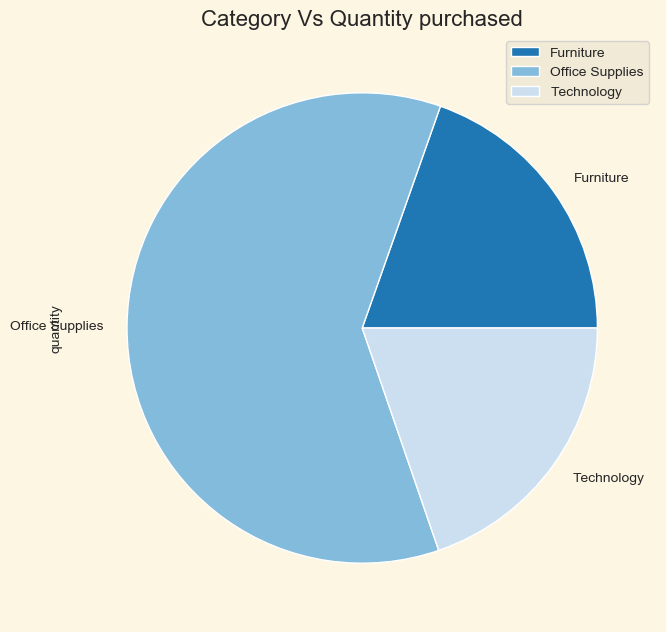

In [195]:
#scategory_VS_QP.plot.pie(y = 'quantity',figsize= (6,10), title = 'Category Vs Quantity purchased')
#plt.style.available
plt.style.use('_mpl-gallery-nogrid')


2. Region VS highest number of products sold and in which category visualization

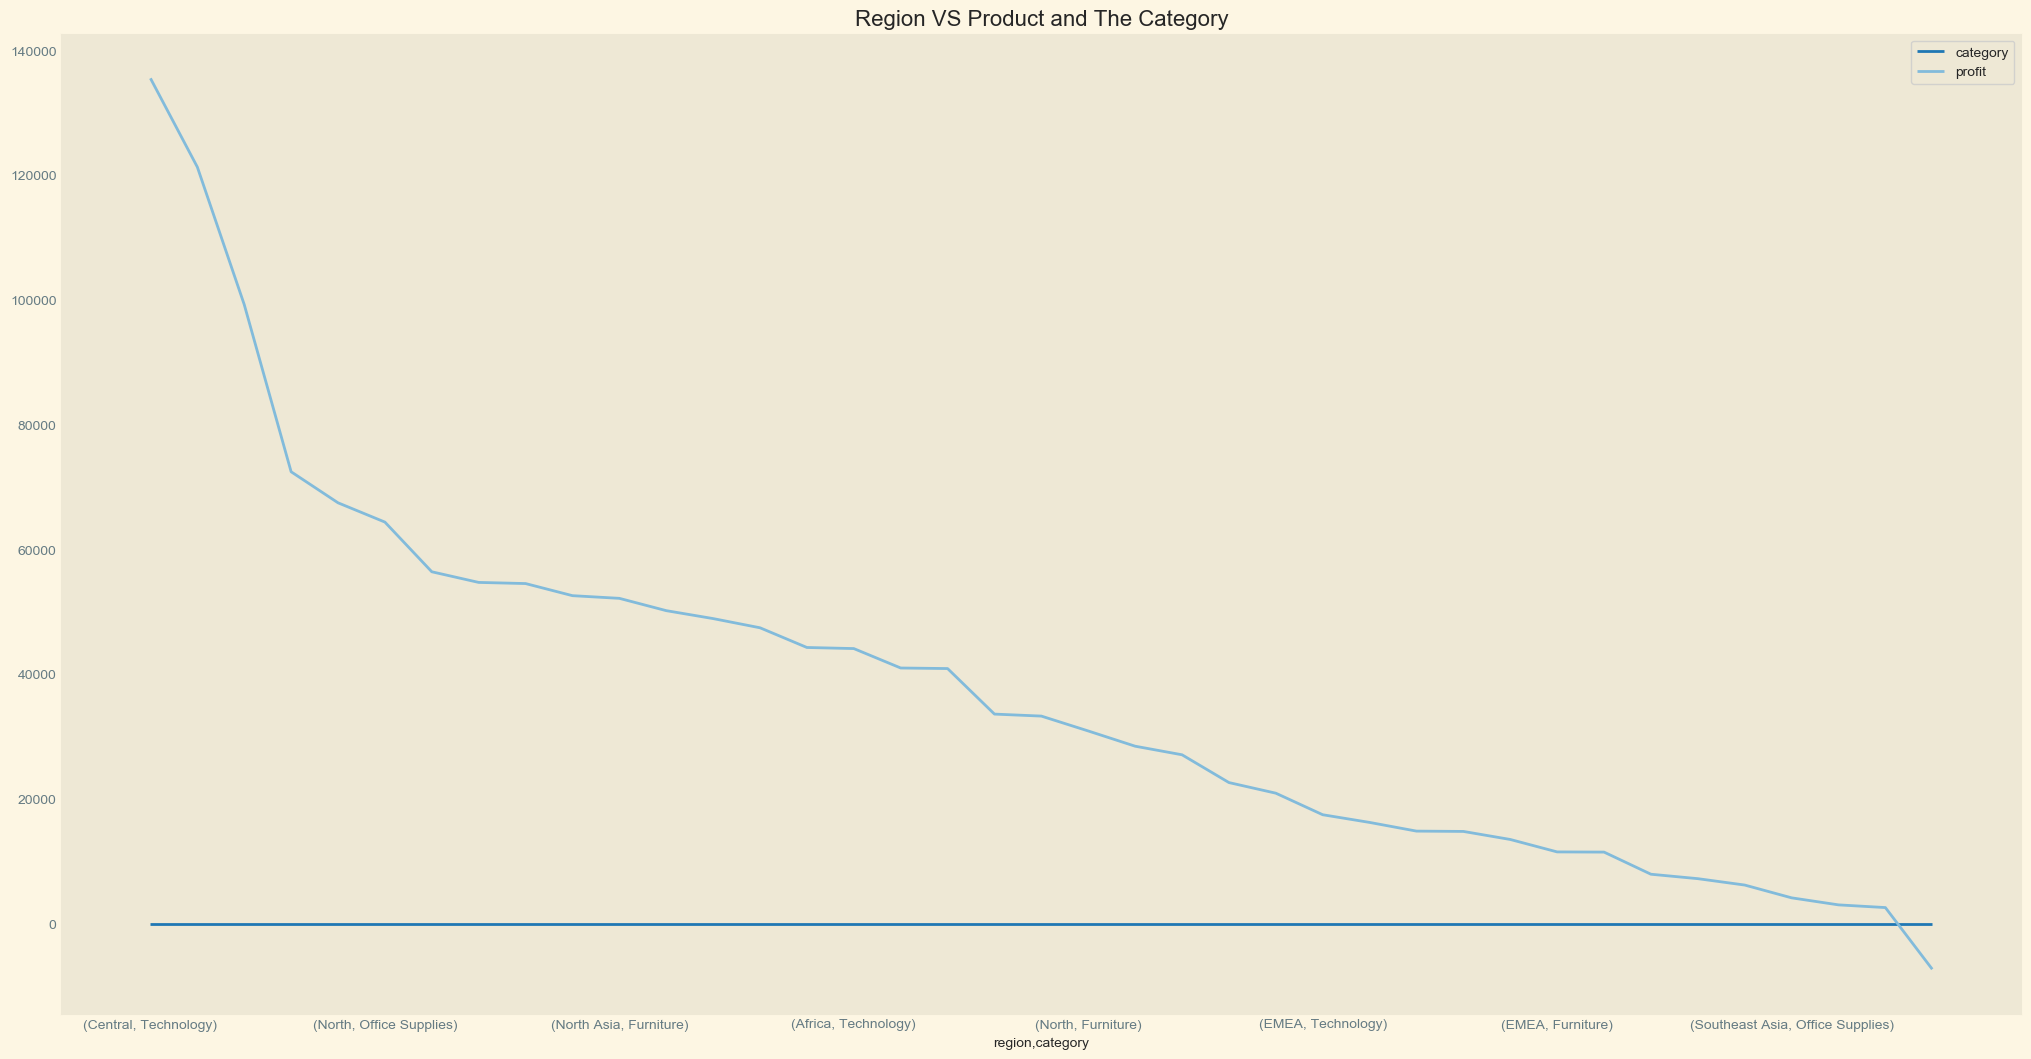

In [170]:
plt.style.use('_classic_test_patch')
v2 = df2.plot( title = 'Region VS Product and The Category' ,figsize = (20,10))

3. The effect of discount on the sales, quantity sold, and profit in the categories

<Axes: xlabel='discount'>

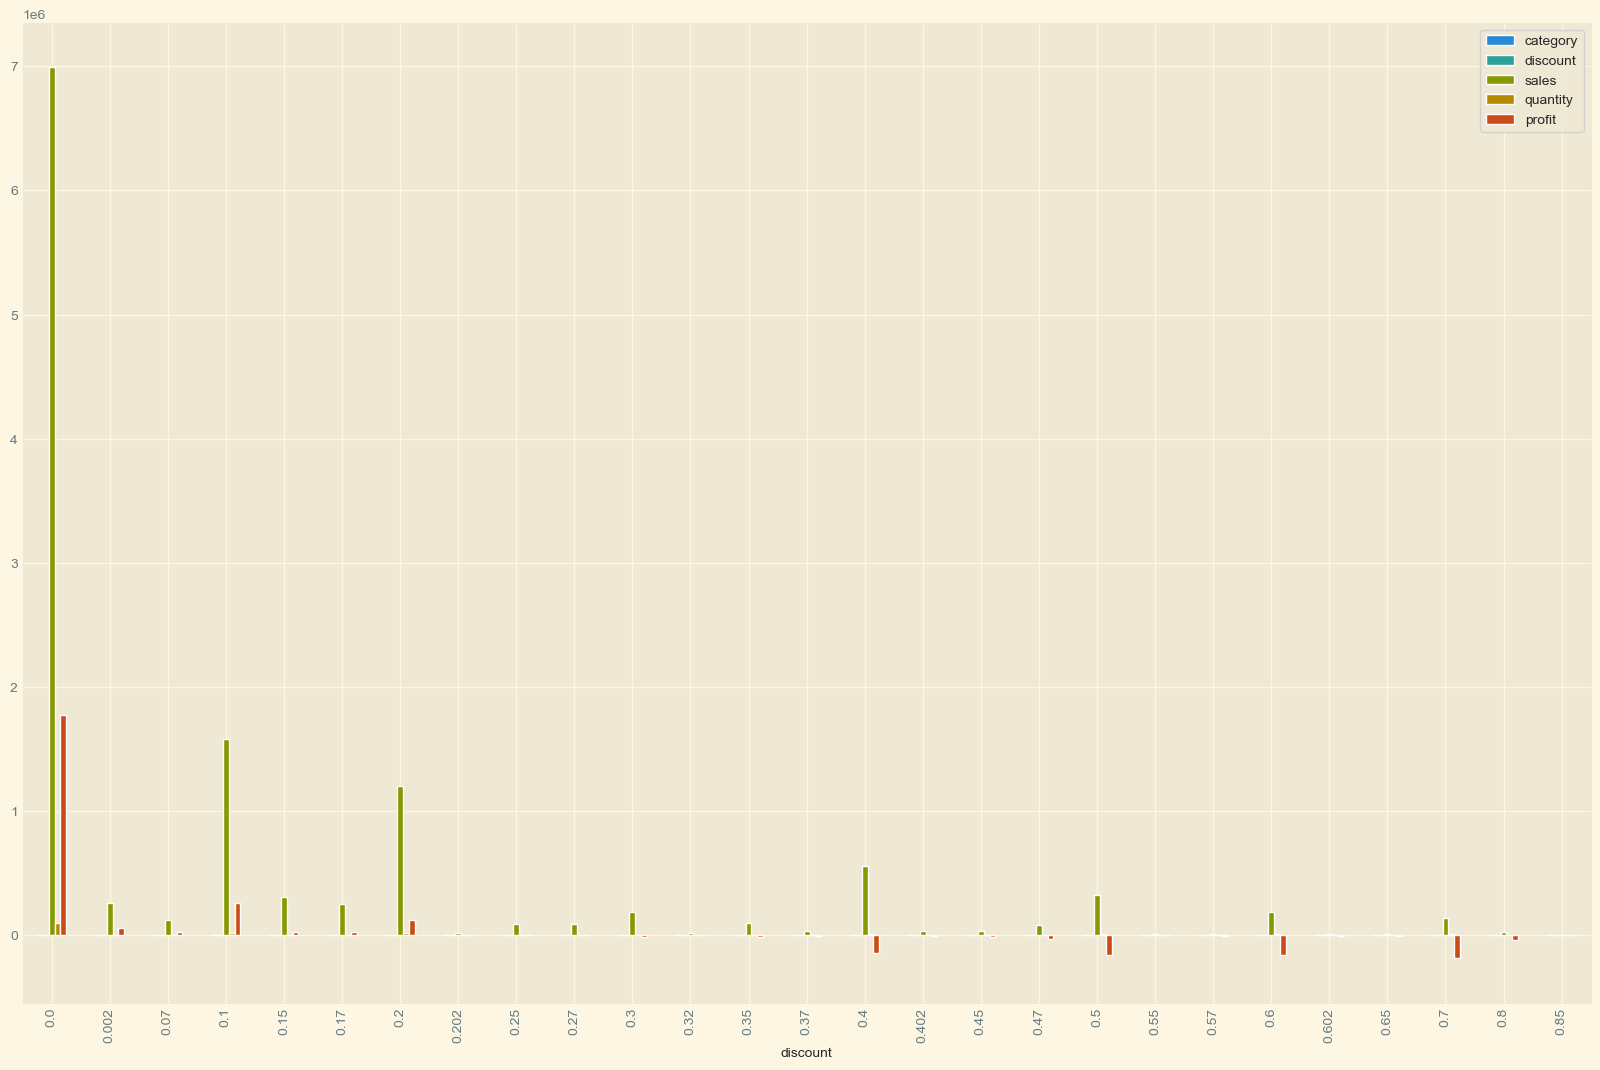

In [171]:
plt.style.use('Solarize_Light2')
df1.plot.bar(figsize=(16,10))


(<Axes: title={'center': 'YEAR 2011 STATISTICS'}, ylabel='Frequency'>,
 <Axes: title={'center': 'YEAR 2012 STATISTICS'}, ylabel='Frequency'>,
 <Axes: title={'center': 'YEAR 2013 STATISTICS'}, ylabel='Frequency'>,
 <Axes: title={'center': 'YEAR 2014 STATISTICS'}, ylabel='Frequency'>,
 <Axes: title={'center': 'YEAR 2011-2014 STATISTICS'}, ylabel='Frequency'>)

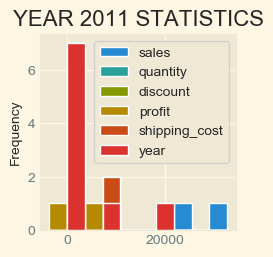

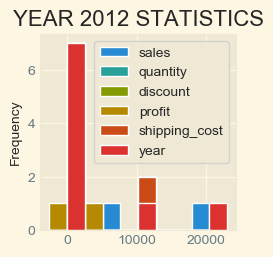

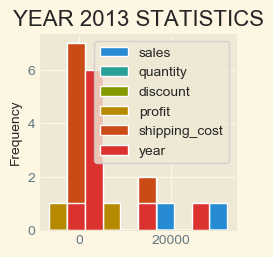

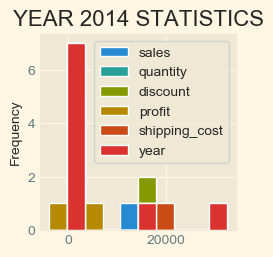

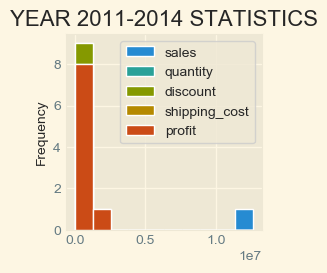

In [172]:
Yearr_2011.plot.hist(title = 'YEAR 2011 STATISTICS'),Yearr_2012.plot.hist(title = 'YEAR 2012 STATISTICS'),Yearr_2013.plot.hist(title = 'YEAR 2013 STATISTICS'),Yearr_2014.plot.hist(title = 'YEAR 2014 STATISTICS'), Yearr_2011_2014.plot.hist(title = 'YEAR 2011-2014 STATISTICS')

#plt.style.use('ggplot')